# A stab in the dark
## What the heck is a stab, anyway?

Doing some analytics on survey responses about using the word "stab" in a sentence.

In [619]:
# The usual suspects

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [341]:
df = pd.read_csv('A stab in the dark.csv')

### Basic counts of responses

I feel like there should be a more elegant way of doing this than looping through the columns, but this is what I've got:

In [620]:
counts = {}

for column in df.columns[1:]:
    count = df.groupby(column)[column].count()
    counts[column] = count

In [621]:
counts_final = pd.DataFrame(counts).fillna(0).transpose()

In [624]:
# Check out the data

counts_final

,"A bit weird, but ok",Incorrect usage,Totally fine
"""He picked up an arrow from the ground, and stabbed me with it.""",2.0,1.0,49.0
"""He picked up the knife and stabbed me.""",1.0,0.0,52.0
"""He stabbed me by throwing the knife at me.""",18.0,24.0,11.0
"""He threw the knife, which spun across the room and stabbed me.""",24.0,10.0,18.0
"""I got stabbed by a knife that was lying on the floor.""",27.0,14.0,11.0
"""I tripped and fell, and the knife on the floor stabbed me.""",37.0,8.0,8.0
"""I was inadvertently stabbed as we tussled.""",6.0,0.0,47.0
"""I was stabbed by a falling arrow.""",23.0,25.0,4.0
"""The archers in the treetops stabbed me with arrows from their bows.""",9.0,40.0,4.0
"""The knife fell off the counter, and stabbed my foot.""",15.0,3.0,35.0


I'd rather not say how long this chart took me. Pyplot is such a weird library, and the documentation sucks. It's starting to make sense now but there's still a lot of what feels like dark magic.

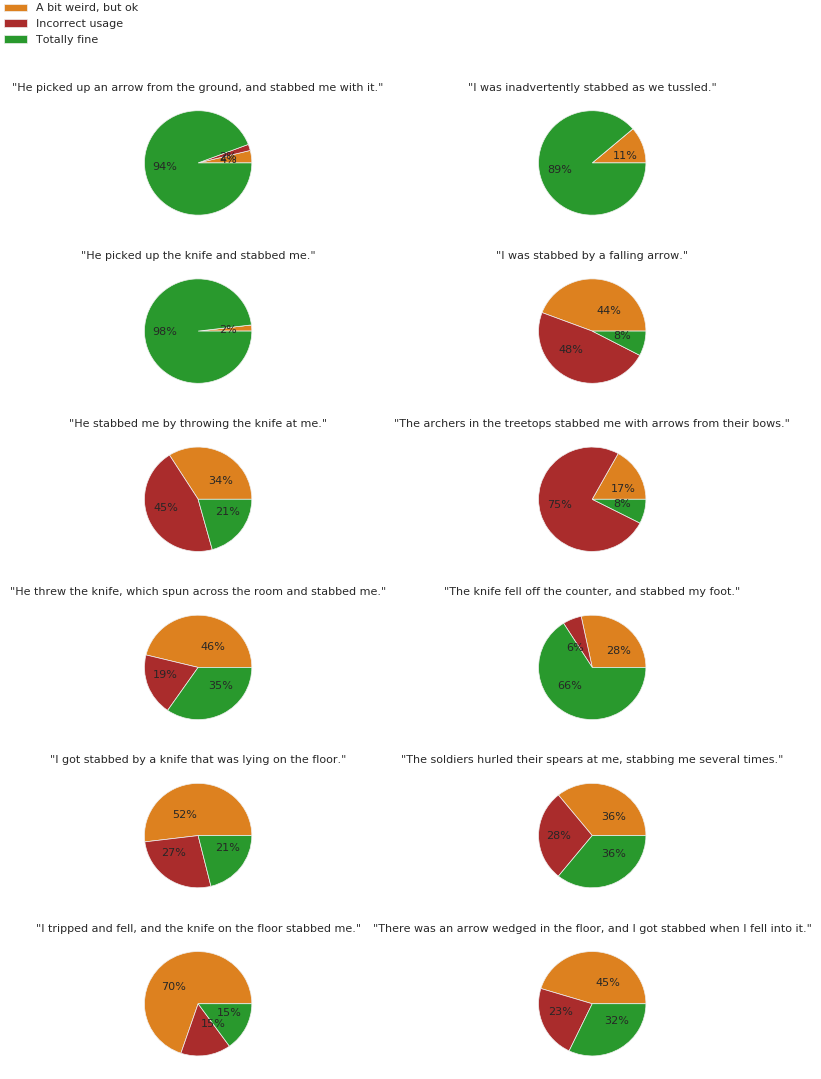

In [228]:
# create a figure with 12 subplots
fig, axes = plt.subplots(6, 2)

# plot each pie chart in a separate subplot
n = 0
for i, data in counts_final.iterrows():
    x = n % 6
    y = n / 6
    ax = axes[x][y] # This is filthy. There must be a better way of doing this.
    patches, texts = ax.pie(data, 
           colors = ['#dd811f', '#aa2c2c', '#29992d'],
           labels = (data/data.sum()).apply(lambda x: "" if x == 0 else "{0:.0f}%".format(x*100)), # Making nice-looking labels
           labeldistance=0.4
           )
    for label in texts:
        label.set_fontsize(8)
    ax.set_title(i)
    ax.title.set_fontsize(8)
    n += 1

fig.set_size_inches(7, 10.3) # Gotta set this right or else the pies come out egg-shaped smh.
fig.legend(patches, 
           counts_final.columns, 
           bbox_to_anchor=(0., 1, 1., .5),
           loc=4, 
           mode="expand", 
           borderaxespad=0.,
           fontsize=8)
plt.tight_layout(w_pad = 8)
plt.savefig('pies.png', bbox_inches='tight')

## Regression

I actually did this bit last, and to be honest I'm not sure I'm doing it right.

I fiddled with different values for the scoring, but this simple approach seemed to work best. 

In [342]:
values = {'A bit weird, but ok': 0, 'Incorrect usage': -1, 'Totally fine': 1, np.nan: None}

respondents = pd.DataFrame([df[column].apply(lambda x: values[x]) for column in df.columns[1:]])


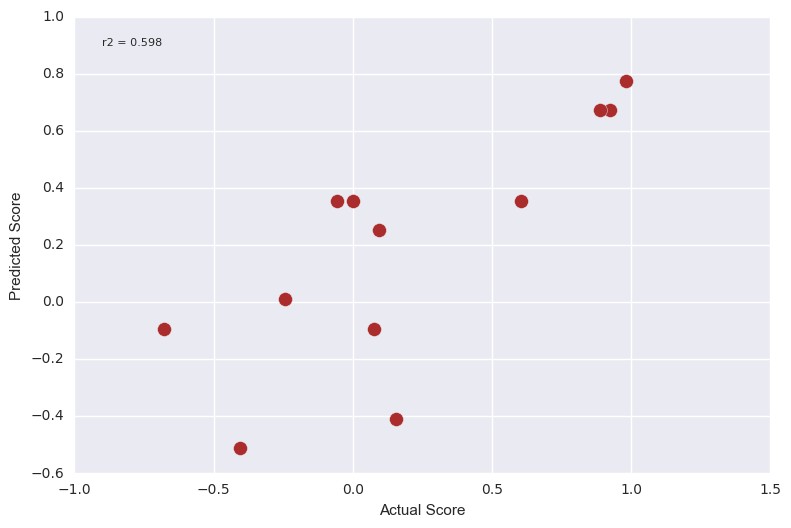

In [617]:
from sklearn.linear_model import LinearRegression

scored = pd.read_csv('scored.csv')
linus = LinearRegression()
linus.fit(scored[['Stabber', 'Range', 'Knife']], scored.Score)
r2 = linus.score(scored[['Stabber', 'Range', 'Knife']], scored.Score)


plt.scatter(scored.Score, linus.predict(scored[['Stabber', 'Range', 'Knife']]),
           s=100,
           c='#aa2c2c')

plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')


plt.annotate("r2 = " + str(round(r2, 3)), (-0.9, 0.9), size = 8)

plt.savefig('regression.png', bbox_inches='tight')

In [618]:
linus.coef_

array([ 0.42016875, -0.76447046,  0.10250904])

## Respondents

Some basic stats on respondents

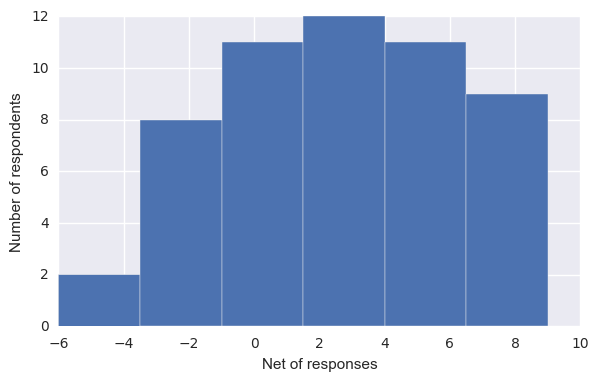

In [625]:
ax = respondents.sum().hist(bins = 6)  # 'Respondents' data frame is created in the 'regression' section above. 
ax.set_xlabel("Net of responses")
ax.set_ylabel("Number of respondents")
plt.savefig('hist.png', bbox_inches='tight')

Finding the highest and lowest-scoring respondents

In [496]:
pd.DataFrame({'max':respondents[respondents.sum().argmax()],
            'min':respondents[respondents.sum().argmin()] })


,max,min
"""He picked up the knife and stabbed me.""",1.0,1.0
"""I tripped and fell, and the knife on the floor stabbed me.""",1.0,-1.0
"""There was an arrow wedged in the floor, and I got stabbed when I fell into it.""",0.0,-1.0
"""The knife fell off the counter, and stabbed my foot.""",1.0,-1.0
"""I got stabbed by a knife that was lying on the floor.""",1.0,-1.0
"""I was stabbed by a falling arrow.""",0.0,-1.0
"""He threw the knife, which spun across the room and stabbed me.""",1.0,-1.0
"""He picked up an arrow from the ground, and stabbed me with it.""",1.0,1.0
"""The archers in the treetops stabbed me with arrows from their bows.""",0.0,-1.0
"""He stabbed me by throwing the knife at me.""",1.0,-1.0


### Clustering

I chose 4 clusters using the traditional method: Fiddling around until the data fit my preconceptions.

In [626]:
fustercluck = KMeans(n_clusters=4)
clustered = pd.DataFrame(respondents.transpose().fillna(0))
means = clustered.mean()
clustered['cluster'] = fustercluck.fit_predict(respondents.corr())

In [627]:
pd.DataFrame(zip(clustered['cluster'].value_counts(), clustered['cluster'].value_counts()/len(clustered)))

,0,1
0,20,0.377358
1,14,0.264151
2,12,0.226415
3,7,0.132075


I just looked at each group in turn, and drew conclusions from the top and bottom couple of sentences, plus general characteristics. To make the differences stand out, I looked at how each group differed from the average for each question.

In [628]:
(clustered.groupby('cluster').mean() - means).transpose()[3].sort_values()

"I was stabbed by a falling arrow."                                                -0.103774
"The knife fell off the counter, and stabbed my foot."                             -0.020440
"I tripped and fell, and the knife on the floor stabbed me."                        0.000000
"He picked up the knife and stabbed me."                                            0.018868
"I was inadvertently stabbed as we tussled."                                        0.029874
"I got stabbed by a knife that was lying on the floor."                             0.056604
"He picked up an arrow from the ground, and stabbed me with it."                    0.094340
"The archers in the treetops stabbed me with arrows from their bows."               0.095912
"He threw the knife, which spun across the room and stabbed me."                    0.182390
"There was an arrow wedged in the floor, and I got stabbed when I fell into it."    0.238994
"He stabbed me by throwing the knife at me."                          

## Clustering Sentences

This was the funnest part! The chart came out pretty good, I think, although it took a lot of fiddling. The whole bit that stops the labels from overlapping each other seems super over-engineered, and there's probably a one-liner in pyplot that does it, but fucked if I can find it.

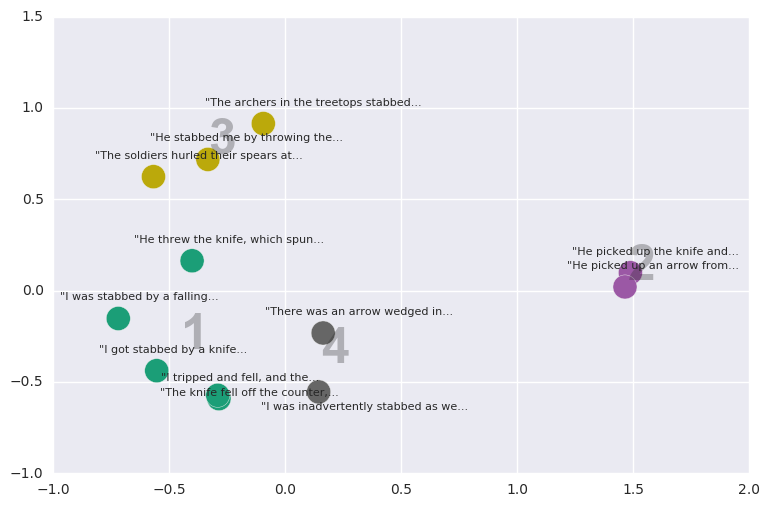

In [565]:
from sklearn import decomposition
import matplotlib.cm as cm

pca = decomposition.PCA(n_components=2)
clustered = pd.DataFrame(respondents.transpose())
X = pca.fit_transform(clustered.corr())

fustercluck = KMeans(n_clusters=4)
clusters = fustercluck.fit_predict(respondents.transpose().corr())

plt.scatter(X[:,0], X[:,1], 
            c = clusters*10, 
            cmap = 'Dark2',
           s = 300)

# This is super obscure, but it's just calculating a centroid for each group and sticking a big ol' number there.
for name, coords in enumerate(pd.DataFrame(zip(X[:,0], X[:,1], clusters)).groupby(2).mean().values): 
    plt.annotate(str(name + 1), coords, size = 36, alpha=0.3, fontweight='bold')

# Get the first six words of...
abridged_columns = [' '.join(column.split(' ')[:6]) + '...' for column in respondents.transpose().columns]

# I think this is the first recursive function I've written!
def avoid_overlap(ys, y):   
    if ((S_ys < y+0.05) & (S_ys > y-0.05)).any():
        return avoid_overlap(ys, y-0.05)
    return y

ys = []

for y in X[:,1]:
    S_ys = pd.Series(ys)
    ys.append(avoid_overlap(S_ys, y))

for x, y, name in zip(X[:,0], ys, abridged_columns):
    plt.annotate(name, (x-0.25, y+0.1), size = 8)

plt.savefig('scatter.png', bbox_inches='tight')